In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('whitegrid')

## PH 3.3

In [2]:
def get_gamma_pdf(a, b, span, resolution=100000):
    rv = stats.gamma(a=a, scale=1/b)
    xs = np.linspace(span[0], span[1], resolution)
    pdf = pd.Series(rv.pdf(xs), index=xs)
    return pdf

Mean 0.07142785714269659
variance 0.0211167007566885
95% interval 10.389238190941795 13.405448325642006


<AxesSubplot:>

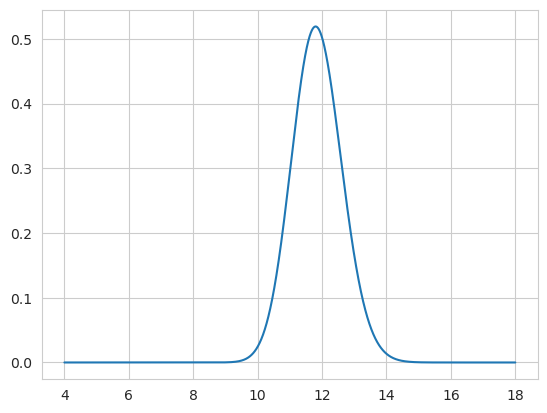

In [3]:
g_rv = stats.gamma(a=237, scale=1/20)
g = get_gamma_pdf(237, 20, (4, 18))

print('Mean', g.mean())
print('variance', g.var())
print("95% interval", g_rv.ppf(0.025), g_rv.ppf(1-0.025))

g.plot()

In [4]:
yA = np.array([12, 9, 12, 14, 13, 13, 15, 8, 15, 6])
yB = np.array([11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7])

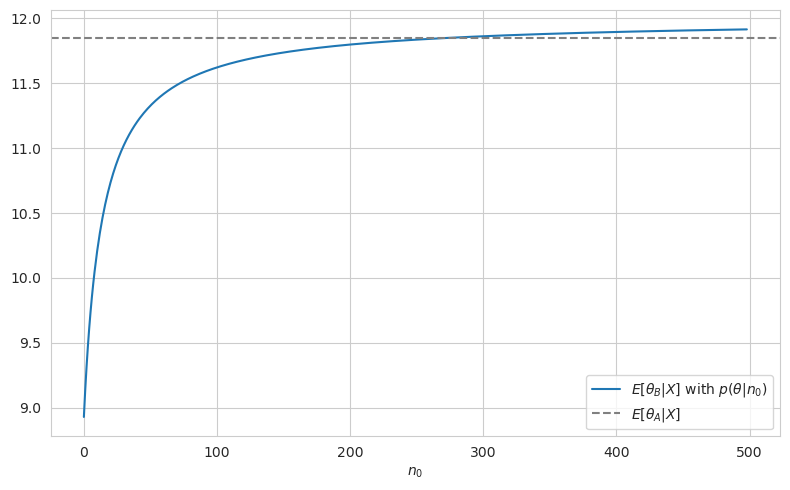

In [47]:
import matplotlib.colors

fig, ax = plt.subplots(figsize=(8, 5))

yB_sum, yB_cnts = yB.sum(), yB.shape[0]
colors = sns.cubehelix_palette(n_colors=50, start=-0.2, rot=0.6, dark=0.45)
n0s = np.arange(1, 500)
yB_means = []
for n0 in n0s:
    yB_prior = (12*n0, n0)  # gamma(a, b)
    yB_post = stats.gamma(yB_prior[0] + yB_sum, scale=1/(yB_prior[1] + yB_cnts))
    yB_means.append(yB_post.mean())

ax.plot(yB_means, label='$E[\\theta_B|X]$ with $p(\\theta|n_0)$')
ax.axhline(stats.gamma(a=237, scale=1/20).mean(), color='grey', linestyle='--', label='$E[\\theta_A|X]$')

ax.set_xlabel('$n_0$')

ax.legend()
fig.tight_layout()
fig.show()

## PH 4.3

In [299]:
def likelihood(rv, data):
    try:
        l = np.prod([rv.pmf(yi) for yi in data], axis=0)
    except AttributeError:
        l = np.prod([rv.pdf(yi) for yi in data], axis=0)

    return l

def bayes_update(prior, likelihood):
    unnorm_pdf = likelihood * prior
    pdf = unnorm_pdf / unnorm_pdf.sum()
    return pdf

In [315]:
yA = np.array([12, 9, 12, 14, 13, 13, 15, 8, 15, 6])
yB = np.array([11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7])

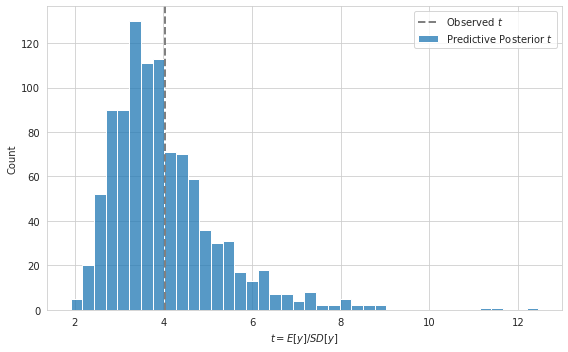

In [358]:
np.random.seed(63486)

n_epoch = 1000
yA_theta_post = stats.gamma(a=237, scale=1/20)

ts = []
for epoch in range(n_epoch):
    theta = yA_theta_post.rvs()
    y_sample = np.random.poisson(theta, size=yA.shape[0])
    tA = y_sample.mean() / y_sample.std()
    ts.append(tA)

observed_t = yA.mean() / yA.std()

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(ts, ax=ax, label='Predictive Posterior $t$')
ax.axvline(observed_t, color='grey', linestyle='--', lw=2, label='Observed $t$')

ax.set_xlabel('$t = E[y] / SD[y]$')

ax.legend()

fig.tight_layout()
fig.show()

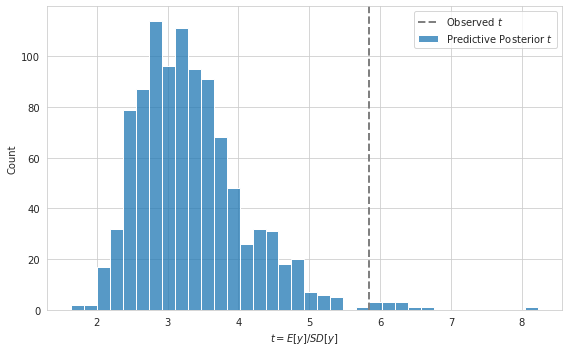

In [362]:
np.random.seed(63486)

n_epoch = 1000
yB_theta_post = stats.gamma(a=125, scale=1/14)

ts = []
for epoch in range(n_epoch):
    theta = yB_theta_post.rvs()
    y_sample = np.random.poisson(theta, size=yB.shape[0])
    tB = y_sample.mean() / y_sample.std()
    ts.append(tB)

observed_t = yB.mean() / yB.std()

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(ts, ax=ax, label='Predictive Posterior $t$')
ax.axvline(observed_t, color='grey', linestyle='--', lw=2, label='Observed $t$')

ax.set_xlabel('$t = E[y] / SD[y]$')

ax.legend()

fig.tight_layout()
fig.show()

## Ex 5

In [376]:
g = stats.gamma(a=210, scale=1/11)

In [378]:
g.mean(), g.median()

(19.09090909090909, 19.060614626597964)

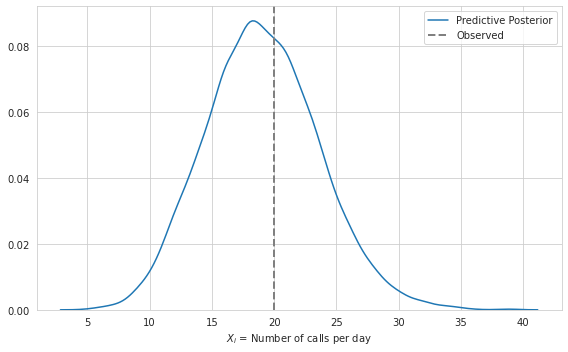

In [394]:
np.random.seed(63486)

n_epoch = 10000
post = stats.gamma(a=210, scale=1/11)

ys = []
for epoch in range(n_epoch):
    theta = post.rvs()
    y_sample = np.random.poisson(theta)
    ys.append(y_sample)

observed_t = 200/10

fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(ys, ax=ax, label='Predictive Posterior')
ax.axvline(observed_t, color='grey', linestyle='--', lw=2, label='Observed')

ax.legend()
ax.set_ylabel("")
ax.set_xlabel("$X_i$ = Number of calls per day")

fig.tight_layout()
fig.show()

## PH 3.8

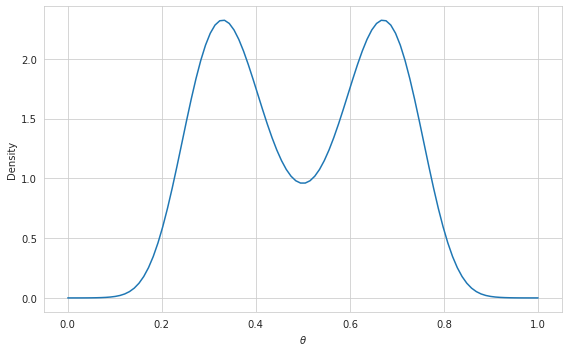

In [3]:
b1 = stats.beta(5, 5)
b2 = stats.beta(12, 24)
b3 = stats.beta(24, 12)

xs = np.linspace(0, 1, 100)
prior = pd.Series(0.2 * b1.pdf(xs) + 0.4 * b3.pdf(xs) + 0.4 * b2.pdf(xs), index=xs)

fig, ax = plt.subplots(figsize=(8, 5))
prior.plot(ax=ax)

ax.set_xlabel("$\\theta$")
ax.set_ylabel("Density")

fig.tight_layout()
fig.show()

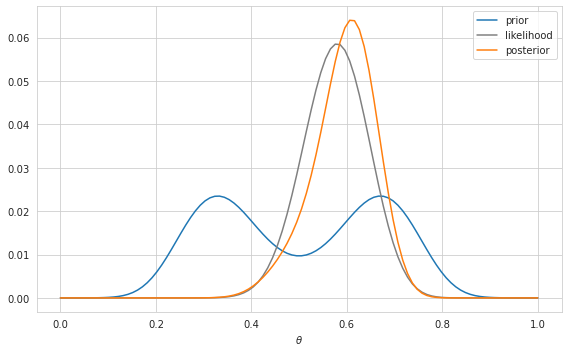

In [4]:
likelihood = pd.Series(stats.binom(n=50, p=xs).pmf(k=29), index=xs)
post = (prior * likelihood) / (prior * likelihood).sum()

fig, ax = plt.subplots(figsize=(8, 5))
(prior / prior.sum()).plot(label='prior', ax=ax)
(likelihood / likelihood.sum()).plot(label='likelihood', color='grey', ax=ax)
post.plot(label='posterior', ax=ax)

ax.legend()
ax.set_xlabel("$\\theta$")

fig.tight_layout()
fig.show()

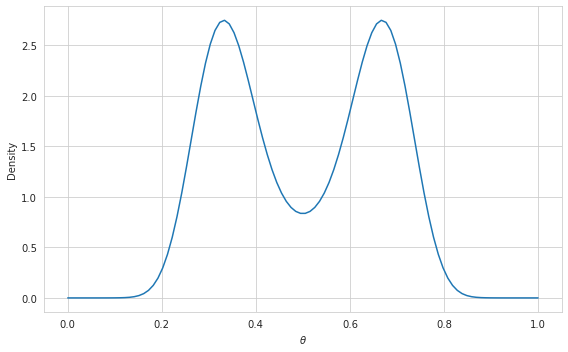

In [6]:
b1 = stats.beta(8, 8)
b2 = stats.beta(18, 36)
b3 = stats.beta(36, 18)

xs = np.linspace(0, 1, 100)
prior = pd.Series(0.2*b1.pdf(xs) + 0.4 * b3.pdf(xs) + 0.4 * b2.pdf(xs), index=xs)

fig, ax = plt.subplots(figsize=(8, 5))
prior.plot(ax=ax)

ax.set_xlabel("$\\theta$")
ax.set_ylabel("Density")

fig.tight_layout()
fig.show()

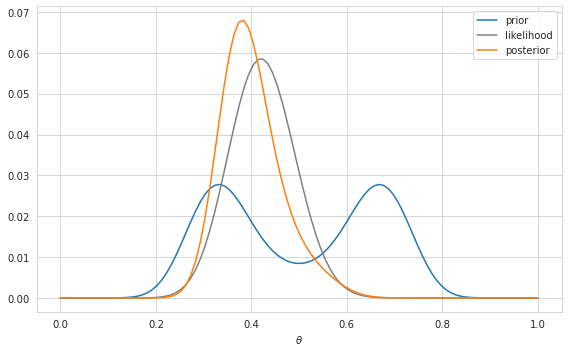

In [7]:
likelihood = pd.Series(stats.binom(n=50, p=xs).pmf(k=21), index=xs)
post = (prior * likelihood) / (prior * likelihood).sum()

fig, ax = plt.subplots(figsize=(8, 5))
(prior / prior.sum()).plot(label='prior', ax=ax)
(likelihood / likelihood.sum()).plot(label='likelihood', color='grey', ax=ax)
post.plot(label='posterior', ax=ax)

ax.legend()
ax.set_xlabel("$\\theta$")

fig.tight_layout()
fig.show()